<a href="https://colab.research.google.com/github/Venkat121002/Final_year_Project/blob/main/Stock_Price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [134]:
from google.colab import files
upload = files.upload()

Saving Stock Price Prediction.csv to Stock Price Prediction (4).csv


In [135]:
data = pd.read_csv(r'Stock Price Prediction.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


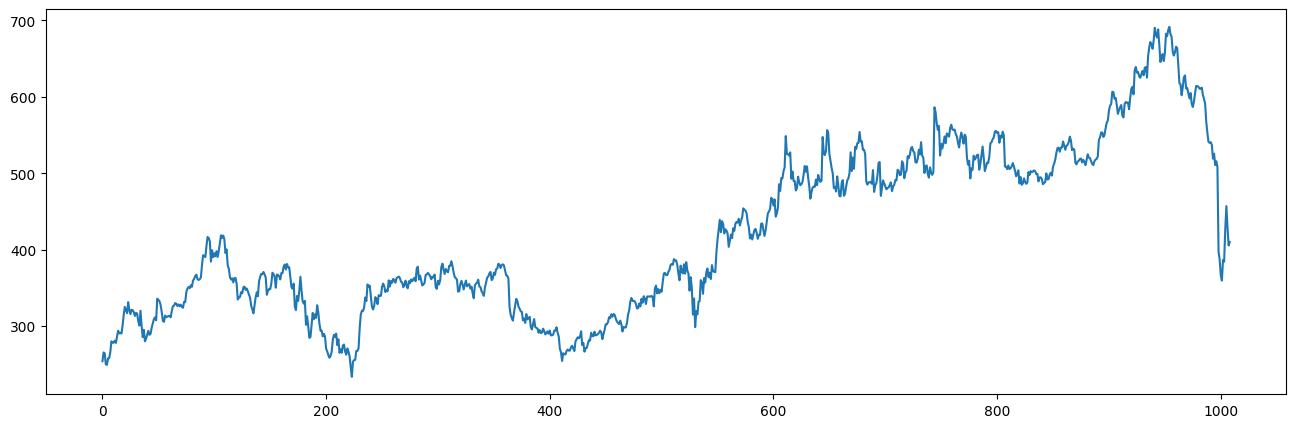

In [136]:
plt.figure(figsize=(16,5))
plt.plot(data['Close'], label = 'Closing Price')

**Classfication Problem** : Buy(+1) or Sell(-1) the stock

In [137]:
data['Open - Close'] = data['Open'] - data['Close']
data["High - Low"] = data['High'] - data['Low']
data = data.dropna()

Input Feautures to predict whether customer should  buy or sell the stack

In [138]:
x = data[['Open - Close', 'High - Low']]
x.head()

,Open - Close,High - Low
0,7.740005,17.869995
1,-18.020004,21.700012
2,2.019989,8.120025
3,16.979981,17.619995
4,4.380005,19.690002


Intention is to store +1 for the buy signal and -1 for the sell signal The target variable is 'Y' for classification task.

In [139]:
y = np.where(data['Close'].shift(-1) > data['Close'],1,-1)

In [140]:
y

array([ 1, -1, -1, ..., -1,  1, -1])

In [141]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_tesst = train_test_split(x, y, test_size = 0.25, random_state = 44)

Implementation CNN classifier

In [142]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

#using griedsearch to find the best parameter
params ={'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn = neighbors.KNeighborsClassifier()
model = GridSearchCV(knn, params, cv=5)

# fit the model
model.fit(x_train, y_train)

#Accuracy score
accuracy_train = accuracy_score(y_train, model.predict(x_train))
accuracy_test = accuracy_score(y_test, model.predict(x_test))

print('Train_data Accuracy: %.2f' %accuracy_train)
print('Train_data Accuracy:%2f' %accuracy_test)

Train_data Accuracy: 0.75
Train_data Accuracy:0.426877


In [143]:
y = data['Close']

In [144]:
y

0       254.259995
1       265.720001
2       264.559998
3       250.100006
4       249.470001
           ...    
1004    427.140015
1005    457.130005
1006    429.480011
1007    405.600006
1008    410.170013
Name: Close, Length: 1009, dtype: float64

In [145]:
predications_classification = model.predict(x_test)

In [146]:
actual_predicted_data = pd.DataFrame({'Actual class': y_test, 'Predicted Class':predications_classification})

In [147]:
actual_predicted_data.head(10)

,Actual class,Predicted Class
0,1,-1
1,1,1
2,-1,1
3,1,-1
4,1,-1
5,-1,1
6,1,-1
7,-1,-1
8,-1,-1
9,-1,-1


**Regression Problem** : KNN

In [148]:
y = data['Close']

In [149]:
y

0       254.259995
1       265.720001
2       264.559998
3       250.100006
4       249.470001
           ...    
1004    427.140015
1005    457.130005
1006    429.480011
1007    405.600006
1008    410.170013
Name: Close, Length: 1009, dtype: float64

Implementation of KNN Regression

In [150]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors

x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(x, y, test_size = 0.25, random_state = 44)

#using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn_reg = neighbors.KNeighborsRegressor()
model_reg = GridSearchCV(knn_reg, params, cv=5)

#fit the model and make predictions
model_reg.fit(x_train_reg,y_train_reg)
predictions = model_reg.predict(x_test_reg)

In [151]:
print(predictions)

[397.6246664  378.18466587 510.465334   440.1599956  417.35733233
 375.96932993 405.3619996  336.4799988  463.25799967 358.091333
 463.44599507 412.254004   444.0613302  447.04800013 367.77533373
 354.60200187 413.0373332  342.8706624  444.3699992  449.78866387
 459.14466347 426.66199953 399.32666833 410.98866353 453.1899964
 403.10133267 412.55199987 442.6719992  477.4953338  361.86199953
 359.217334   377.49199627 365.67466433 405.51666667 407.499998
 338.37333167 400.98132933 457.19066567 356.34066373 428.8886698
 419.53600053 454.83333533 498.04665947 364.13400067 420.0513306
 427.7600026  428.92199707 351.98999633 466.9533326  347.55599767
 410.38733107 429.15466713 398.017336   404.92000133 509.136676
 436.32399913 453.034672   365.57333373 420.37866607 436.66199533
 457.34533087 465.58733927 346.98266807 344.43800253 435.74666747
 373.0373312  498.12866607 412.0466614  398.80666507 444.12732953
 417.4373332  410.3640024  365.476001   366.093335   440.8186666
 423.9006632  490.19

In [152]:
#rmse
rms = np.sqrt(np.mean(np.power((np.array(y_test)-np.array(predictions)),2)))
rms

422.1124703408482

In [153]:
valid = pd.DataFrame({'Actual Close': y_test_reg, 'predicted Close value': predictions})

In [154]:
valid.head(10)

,Actual Close,predicted Close value
390,291.440002,397.624666
414,263.079987,378.184666
724,534.450012,510.465334
19,315.000000,440.159996
496,342.880005,417.357332
687,488.929993,375.969330
376,307.630005,405.362000
132,337.489990,336.479999
677,554.090027,463.258000
68,328.529999,358.091333
